# Import Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
print("Done")

Done


# Preparation 

In [2]:
data_list = ["homedepot.com_204074796.csv", "homedepot.com_319247071.csv", "lowes.com_3286026.csv",
             "lowes.com_3380314.csv", "lowes.com_50280511.csv", "lowes.com_1003066162.csv", "lowes.com_5000026209.csv",
            "lowes.com_5001899855.csv"]

# read in data
df = pd.read_csv(data_list[0])
df.head()

,Market_place,URL,Product_name,SKU,Price,Currency,Subject,Author,Date,Review,Stars
0,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Tiny pool of water in the bowl.,GreatAim,"Nov 22, 2022",I purchased 4 of these toilets for my new hous...,1
1,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Cheap seat and lid,Dee2,"Sep 26, 2022","I recently bought the chair height, elongated ...",2
2,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Nice color and sits at a great height for gett...,HomeDepotCustomer,"Jun 15, 2022",Nice color and sits at a great height for gett...,4
3,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Great Value / Nice Product,DENISE,"Feb 8, 2022",This toilet is a great value and looks and per...,5
4,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Good value toilet,Tom_P,"Dec 25, 2021",Looks good - Easy install with no issues. The ...,4


Stars Counts

Text(0.5, 0, 'Review Stars')

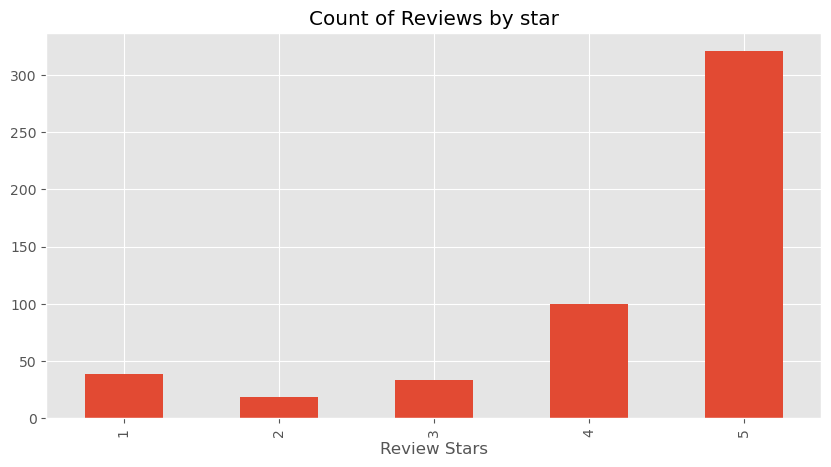

In [3]:
ax = df['Stars'].value_counts().sort_index()\
    .plot(kind= 'bar',
          title = 'Count of Reviews by star',
         figsize = (10,5))
ax.set_xlabel('Review Stars')

# Data

In [4]:
good = df[df["Stars"] >= 4]

bad = df[df["Stars"] <= 3]

In [5]:
good_reviews = good['Review']
good_reviews = pd.DataFrame(good_reviews)
good_reviews['Subject'] = good['Subject']
good_reviews['Stars'] = good['Stars']
good_reviews.dropna(inplace= True)
good_reviews.index = np.arange(0,len(good_reviews))
good_reviews['ID'] = np.arange(1,len(good_reviews)+1)
good_reviews

,Review,Subject,Stars,ID
0,Nice color and sits at a great height for gett...,Nice color and sits at a great height for gett...,4,1
1,This toilet is a great value and looks and per...,Great Value / Nice Product,5,2
2,Looks good - Easy install with no issues. The ...,Good value toilet,4,3
3,Rating provided by a verified purchaser,Rating provided by a verified purchaser...,4,4
4,Very elegant in appearance and it is very comf...,Very elegant in appearance and it is very comf...,4,5
...,...,...,...,...
240,"Easy to install, and leak free. Once in use, t...","Easy to install, and leak free. Once in use,...",4,241
241,It was easy to install. Works great. Thanks.,It was easy to install. Works great. Thanks....,5,242
242,Comes with almost everything. Missing the fres...,Get what you pay,4,243
243,Fit perfectly. Includes wax ring and bolts,Fit perfectly. Includes wax ring and bolts...,5,244


In [6]:
bad_reviews = bad['Review']
bad_reviews = pd.DataFrame(bad_reviews)
bad_reviews['Subject'] = bad['Subject']
bad_reviews['Stars'] = bad['Stars']
bad_reviews.dropna(inplace= True)
bad_reviews.index = np.arange(0,len(bad_reviews))
bad_reviews['ID'] = np.arange(1,len(bad_reviews)+1)
bad_reviews

,Review,Subject,Stars,ID
0,I purchased 4 of these toilets for my new hous...,Tiny pool of water in the bowl.,1,1
1,"I recently bought the chair height, elongated ...",Cheap seat and lid,2,2
2,Terrible product. Bowl won't stay full and the...,The only thing efficient is the malfunctioning.,1,3
3,This toilet is way to high. The actual measure...,Terrible,1,4
4,The first thing I noticed were several holes i...,"Holes in Bowl, Seat wont stay up",1,5
...,...,...,...,...
74,water will not stay in the bowl you have to fl...,water will not stay in the bowl you have to...,1,75
75,"After a bowel movement , the bowl will not tak...","After a bowel movement , the bowl will not tak...",2,76
76,I had American Standard toilet in my house for...,Worst toilet ever,1,77
77,No power to the flush very low water sorry I g...,No power to the flush very low water sorry I...,2,78


# VADER Seniment Scoring

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [8]:
res = {}
for i, row in tqdm(good_reviews.iterrows(), total = len(good_reviews)):
    review = row['Review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(review)
    


  0%|          | 0/245 [00:00<?, ?it/s]

In [9]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'ID'})
vaders = vaders.merge(good_reviews, how= 'left')
vaders.head()

,ID,neg,neu,pos,compound,Review,Subject,Stars
0,1,0.090,0.705,0.205,0.7584,Nice color and sits at a great height for gett...,Nice color and sits at a great height for gett...,4
1,2,0.000,0.427,0.573,0.9442,This toilet is a great value and looks and per...,Great Value / Nice Product,5
2,3,0.070,0.811,0.119,0.3071,Looks good - Easy install with no issues. The ...,Good value toilet,4
3,4,0.000,1.000,0.000,0.0000,Rating provided by a verified purchaser,Rating provided by a verified purchaser...,4
4,5,0.084,0.763,0.152,0.8656,Very elegant in appearance and it is very comf...,Very elegant in appearance and it is very comf...,4


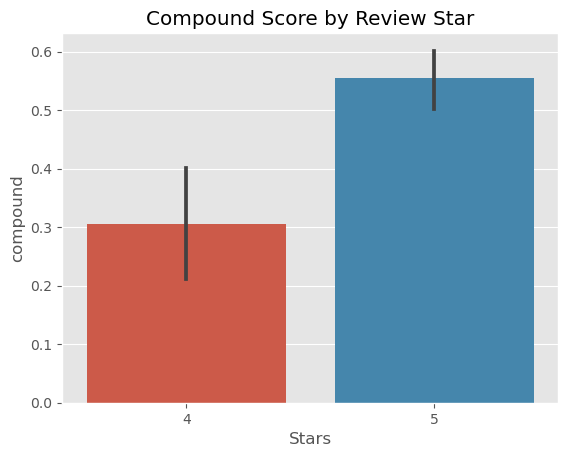

In [10]:
ax = sns.barplot(data= vaders, x = 'Stars', y= 'compound')
ax.set_title('Compound Score by Review Star')
plt.show()

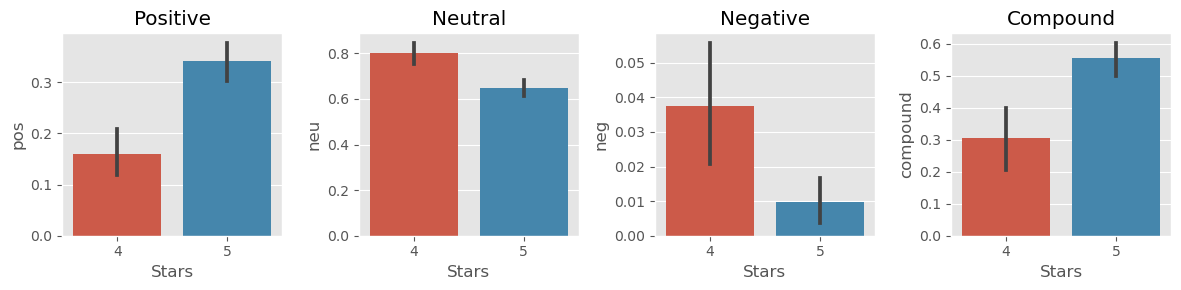

In [11]:
fig, axs = plt.subplots(1,4, figsize = (12,3))
sns.barplot(data= vaders, x= 'Stars', y= 'pos', ax = axs[0])
sns.barplot(data= vaders, x= 'Stars', y= 'neu', ax = axs[1])
sns.barplot(data= vaders, x= 'Stars', y= 'neg', ax = axs[2])
sns.barplot(data= vaders, x = 'Stars', y= 'compound', ax = axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model (Working on)

In [13]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax
#import pytorch

/opt/anaconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
2023-02-15 09:48:31.004575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)


2023-02-15 09:48:40.881398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
